In [50]:
# 필요 모듈 임포트

from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re
import pandas as pd
import numpy as np

# 해시태그 검색어
keyword = "새마을시장"
count = 300

# 로그인 정보
username = 'rlalswns__'
userpw = 'wkdtmd95(%'
time.sleep(3)

# 해시태그 url 값
url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

# dataframe 만들기 (해시태그는 총 20개까지 크롤링)
insta_df = pd.DataFrame("", index=np.arange(1,count+1), columns=["account","date", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10" , "t11", "t12", "t13", "t14", "t15", "t16", "t17", "t18", "t19", "t20"])
instagram_account =[]
instagram_tags = []
instagram_tag_dates = []

# 인스타 로그인 URL
loginUrl = 'https://www.instagram.com/accounts/login/'

# Chrome drvier 실행
driver = wd.Chrome("C:/Users/김민준/Desktop/빅데이터프로그래밍/분석/chromedriver.exe")
driver.get(loginUrl)
time.sleep(2)

# login
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(2)
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(3)

# 정보 나중에 저장하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF').click()
time.sleep(3)
# 설정 나중에하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(3)

# 해시태그 검색 창에 "키워드" 검색
driver.get(url)
time.sleep(15)

# 맨 왼쪽 상단 첫 게시물 클릭
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()
time.sleep(3)

# 데이터 기록, 다음 게시물로 클릭
for i in range(count):
    try: 
        # account 데이터 기록
        account_data = driver.find_element_by_css_selector('a.sqdOP.yWX7d._8A5w5.ZIAjV')
        account_text = account_data.text
        
        # 날짜 기록 (주단위)
        date = driver.find_element_by_css_selector("time.FH9sR.Nzb55").text # 날짜 선택
        
        # 날짜 데이터가 시간, 일, 분 단위이면 0주로 변환
        if date.find('시간') != -1 or date.find('일') != -1 or date.find('분') != -1:
            date_text = '0주'
        else:
            date_text = date
        # 해쉬태그 데이터 기록
        data = driver.find_element_by_css_selector('.C7I1f.X7jCj')
        tag_raw = data.text
        tag = re.findall('#[A-Za-z0-9가-힣]+', tag_raw)
        tag = ''.join(tag).replace("#"," ") # "#" 제거
        tag_data = tag.split()
    except:
        tag_data = "error"
        date_text = "error"
        
    try: # 최대 50초까지 기다렸다가, > 모양 클릭하여 다음 게시물로 넘어가기
        WebDriverWait(driver,50).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a._65Bje.coreSpriteRightPaginationArrow')))
        driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow').click()
    except:
        print("크롤링이 비정상적으로 종료되었습니다")
        driver.quit()
    
    time.sleep(5)
    print('{}, {}번째 게시물 탐색 완료'.format(time.strftime('%c', time.localtime(time.time())), i+1))
    print(account_text)
    print(date_text)
        
    # dataframe에 계정정보, 날짜 저장
    insta_df.iloc[i, 0] = account_text
    insta_df.iloc[i, 1] = date_text
    
    # 해시태그저장, 20개가 넘으면 20개까지만 저장됨
    for j in range(17):
        try:
            insta_df.iloc[i,j+2] = tag_data[j]
        except:
            break


# 결과값 저장
insta_df.to_excel("C:/Users/김민준/Desktop/빅데이터프로그래밍/분석/"+keyword+"_results.xlsx")

# 크롬드라이버 종료
print('크롤링 종료')
driver.quit()

Wed Jun  2 06:09:02 2021, 1번째 게시물 탐색 완료
kp_joon_
18주
Wed Jun  2 06:09:08 2021, 2번째 게시물 탐색 완료
songchelin_guide
123주
Wed Jun  2 06:09:13 2021, 3번째 게시물 탐색 완료
bigbites_dongilmoon
44주
Wed Jun  2 06:09:19 2021, 4번째 게시물 탐색 완료
grandnim_foodie
81주
Wed Jun  2 06:09:24 2021, 5번째 게시물 탐색 완료
ten_taeeun
281주
Wed Jun  2 06:09:30 2021, 6번째 게시물 탐색 완료
cabooootin
63주
Wed Jun  2 06:09:35 2021, 7번째 게시물 탐색 완료
hye___________ji
301주
Wed Jun  2 06:09:41 2021, 8번째 게시물 탐색 완료
loveat._._
20주
Wed Jun  2 06:09:46 2021, 9번째 게시물 탐색 완료
kerkiti
186주
Wed Jun  2 06:09:52 2021, 10번째 게시물 탐색 완료
june_a_mom07
0주
Wed Jun  2 06:09:57 2021, 11번째 게시물 탐색 완료
monamona_macaron
0주
Wed Jun  2 06:10:03 2021, 12번째 게시물 탐색 완료
byelcashmere
0주
Wed Jun  2 06:10:08 2021, 13번째 게시물 탐색 완료
byelcashmere
0주
Wed Jun  2 06:10:13 2021, 14번째 게시물 탐색 완료
nailhan_son
0주
Wed Jun  2 06:10:19 2021, 15번째 게시물 탐색 완료
je_reve_seoul
0주
Wed Jun  2 06:10:24 2021, 16번째 게시물 탐색 완료
yeoldusiae
0주
Wed Jun  2 06:10:30 2021, 17번째 게시물 탐색 완료
monamona_macaron
0주
Wed Jun  2 06:10:3

Wed Jun  2 06:22:03 2021, 145번째 게시물 탐색 완료
sticka_daily
4주
Wed Jun  2 06:22:08 2021, 146번째 게시물 탐색 완료
jannii_lee
4주
Wed Jun  2 06:22:13 2021, 147번째 게시물 탐색 완료
je_reve_seoul
4주
Wed Jun  2 06:22:18 2021, 148번째 게시물 탐색 완료
peaunet
4주
Wed Jun  2 06:22:23 2021, 149번째 게시물 탐색 완료
picnic_green_
4주
Wed Jun  2 06:22:29 2021, 150번째 게시물 탐색 완료
theflowerof_joy
4주
Wed Jun  2 06:22:34 2021, 151번째 게시물 탐색 완료
theflowerof_joy
4주
Wed Jun  2 06:22:39 2021, 152번째 게시물 탐색 완료
mini_nail_hyunjung
4주
Wed Jun  2 06:22:44 2021, 153번째 게시물 탐색 완료
hino_gohan
4주
Wed Jun  2 06:22:49 2021, 154번째 게시물 탐색 완료
je_reve_seoul
4주
Wed Jun  2 06:22:54 2021, 155번째 게시물 탐색 완료
yeoldusiae
4주
Wed Jun  2 06:23:00 2021, 156번째 게시물 탐색 완료
songa777
4주
Wed Jun  2 06:23:05 2021, 157번째 게시물 탐색 완료
yeoldusiae
4주
Wed Jun  2 06:23:10 2021, 158번째 게시물 탐색 완료
wooa_cos
4주
Wed Jun  2 06:23:15 2021, 159번째 게시물 탐색 완료
theflowerof_joy
4주
Wed Jun  2 06:23:20 2021, 160번째 게시물 탐색 완료
je_reve_seoul
4주
Wed Jun  2 06:23:25 2021, 161번째 게시물 탐색 완료
monamona_macaron
4주
Wed Jun  2 0

Wed Jun  2 06:34:14 2021, 287번째 게시물 탐색 완료
yeoldusiae
8주
Wed Jun  2 06:34:19 2021, 288번째 게시물 탐색 완료
saemaul_bunsik
8주
Wed Jun  2 06:34:24 2021, 289번째 게시물 탐색 완료
gentil_seoul
8주
Wed Jun  2 06:34:30 2021, 290번째 게시물 탐색 완료
je_reve_seoul
8주
Wed Jun  2 06:34:35 2021, 291번째 게시물 탐색 완료
je_reve_seoul
8주
Wed Jun  2 06:34:40 2021, 292번째 게시물 탐색 완료
jin_twinsmom
8주
Wed Jun  2 06:34:45 2021, 293번째 게시물 탐색 완료
yeoldusiae
8주
Wed Jun  2 06:34:50 2021, 294번째 게시물 탐색 완료
yaaaaam_h
8주
Wed Jun  2 06:34:55 2021, 295번째 게시물 탐색 완료
monamona_macaron
9주
Wed Jun  2 06:35:01 2021, 296번째 게시물 탐색 완료
mingyun.e
9주
Wed Jun  2 06:35:06 2021, 297번째 게시물 탐색 완료
gentil_seoul
9주
Wed Jun  2 06:35:11 2021, 298번째 게시물 탐색 완료
picnic_green_
9주
Wed Jun  2 06:35:16 2021, 299번째 게시물 탐색 완료
yeoldusiae
9주
Wed Jun  2 06:35:21 2021, 300번째 게시물 탐색 완료
nailhan_son
9주
크롤링 종료


In [49]:
mangwon = pd.read_csv("./영등포시장_results.csv", encoding='utf-8')

In [25]:
# import sys
# import io
# sys.stdout = io.TextIOWrapper(sys.stdout.detach(), encoding = 'utf-8')
# sys.stderr = io.TextIOWrapper(sys.stderr.detach(), encoding = 'utf-8')

mangwon_t1 = list(np.array(mangwon["t1"].tolist()))
mangwon_t2 = list(np.array(mangwon["t2"].tolist()))
mangwon_t3 = list(np.array(mangwon["t3"].tolist()))
mangwon_t4 = list(np.array(mangwon["t4"].tolist()))
mangwon_t5 = list(np.array(mangwon["t5"].tolist()))
mangwon_t6 = list(np.array(mangwon["t6"].tolist()))
mangwon_t7 = list(np.array(mangwon["t7"].tolist()))
mangwon_t8 = list(np.array(mangwon["t8"].tolist()))
mangwon_t9 = list(np.array(mangwon["t9"].tolist()))
mangwon_t10 = list(np.array(mangwon["t10"].tolist()))
mangwon_t11 = list(np.array(mangwon["t11"].tolist()))
mangwon_t12 = list(np.array(mangwon["t12"].tolist()))

instagram_tags = mangwon_t1 + mangwon_t2 + mangwon_t3 + mangwon_t4 + mangwon_t5 + mangwon_t6 + mangwon_t7 + mangwon_t8 + mangwon_t9 + mangwon_t10 + mangwon_t11 + mangwon_t12

In [43]:
# 물용어 처리
stop_words = ['nan','망원시장','망원동','망원동맛집','망원', '망원시장맛집'] 
instagram_tags = [word for word in instagram_tags if word not in stop_words]

In [44]:
from collections import Counter 
count = Counter(instagram_tags)
common_tag_200 = count.most_common(200)

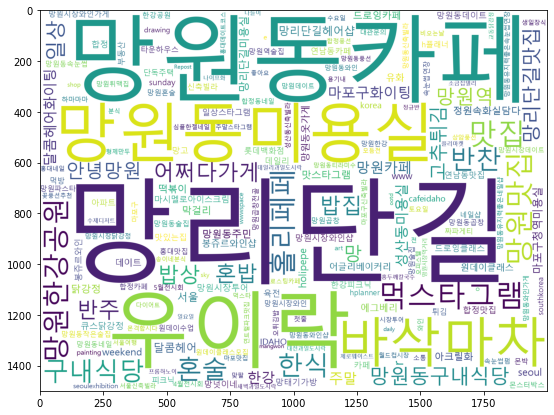

In [45]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

matplotlib.rcParams['font.family'] = "Maulgun Gothic"
font_path="C:/Windows/Fonts/malgun.ttf"

wc = WordCloud(font_path=font_path, background_color="white", 
               width = 2000, height = 1500)
cloud = wc.generate_from_frequencies(dict(common_tag_200))
plt.figure(figsize=(10,7))
plt.imshow(cloud)

In [42]:
string_ex = list(np.array(mangwon["date"].tolist()))
c1 = Counter(string_ex)
c1

Counter({'1주': 401,
         '6주': 3,
         '3주': 1,
         '11주': 1,
         '2주': 194,
         '10주': 1,
         '0주': 391,
         'error': 7,
         '66주': 1})